[View in Colaboratory](https://colab.research.google.com/github/ChaitraliL/papers/blob/master/fashion_mnist_NN.ipynb)

In [0]:
import tensorflow as tf
from tensorflow import keras

# Other Dependancies
import numpy as np
import matplotlib.pyplot as plt

In [0]:
fashion_mnist = keras.datasets.fashion_mnist

In [4]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [5]:
print("Training set (images) shape: {shape}".format(shape=train_images.shape))
print("Training set (labels) shape: {shape}".format(shape=train_labels.shape))

Training set (images) shape: (60000, 28, 28)
Training set (labels) shape: (60000,)


In [7]:
print("Test set (images) shape: {shape}".format(shape=test_images.shape))
print("Test set (labels) shape: {shape}".format(shape=test_labels.shape))

Test set (images) shape: (10000, 28, 28)
Test set (labels) shape: (10000,)


In [0]:
Categories = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

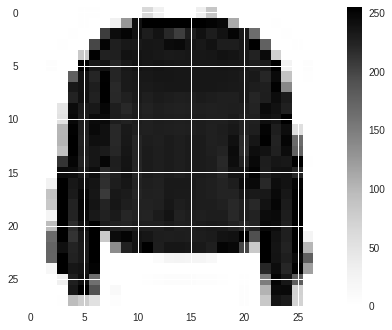

In [13]:
plt.figure()
plt.imshow(train_images[7])
plt.colorbar()
plt.grid(True)

In [0]:
train_images = train_images/255.0
test_images = test_images/255.0

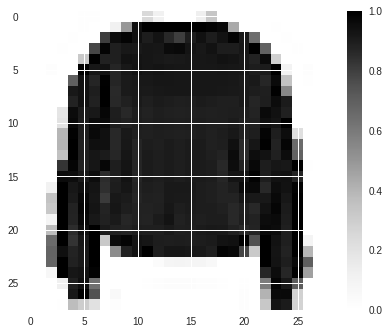

In [15]:
plt.figure()
plt.imshow(train_images[7])
plt.colorbar()
plt.grid(True)

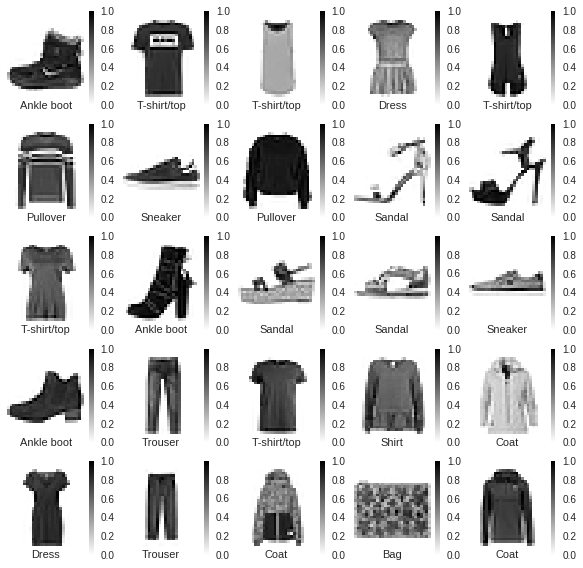

In [21]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.colorbar()
    plt.grid(False)
    plt.xlabel(Categories[train_labels[i]])

In [0]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [0]:
model.compile(optimizer=tf.train.AdamOptimizer(), 
              loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

In [24]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 4s 72us/step - loss: 0.4930 - acc: 0.8267
Epoch 2/10
60000/60000 [==============================] - 4s 70us/step - loss: 0.3750 - acc: 0.8647
Epoch 3/10
60000/60000 [==============================] - 4s 70us/step - loss: 0.3362 - acc: 0.8775
Epoch 4/10
60000/60000 [==============================] - 4s 69us/step - loss: 0.3121 - acc: 0.8858
Epoch 5/10
60000/60000 [==============================] - 4s 70us/step - loss: 0.2970 - acc: 0.8904
Epoch 6/10
60000/60000 [==============================] - 4s 70us/step - loss: 0.2811 - acc: 0.8961
Epoch 7/10
60000/60000 [==============================] - 4s 69us/step - loss: 0.2690 - acc: 0.9011
Epoch 8/10
60000/60000 [==============================] - 4s 69us/step - loss: 0.2580 - acc: 0.9033
Epoch 9/10
60000/60000 [==============================] - 4s 71us/step - loss: 0.2464 - acc: 0.9083
Epoch 10/10
60000/60000 [==============================] - 4s 70us/step - loss: 0.2384 - acc: 0.9109

In [25]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 26us/step
Test accuracy: 0.8828


In [0]:
predictions = model.predict(test_images)

In [27]:
predictions[0]

array([1.0471903e-06, 1.7182328e-10, 8.5073129e-11, 7.8585076e-09,
       1.3022974e-10, 4.7422055e-04, 2.0615630e-08, 1.3626666e-02,
       6.2667624e-08, 9.8589790e-01], dtype=float32)

In [29]:
np.argmax(predictions[0])

9

In [30]:
test_labels[0]

9

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img, cmap=plt.cm.binary)
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(Categories[predicted_label],
                                100*np.max(predictions_array),
                                Categories[true_label]),color=color)

In [0]:
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

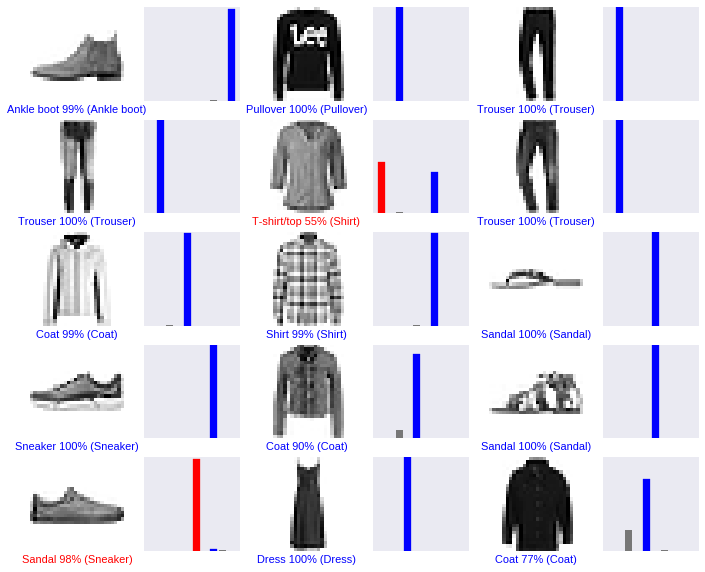

In [34]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)